In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('datasets/house_data_preprocessed.csv')
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [3]:
house_data.shape

(21613, 16)

In [5]:
target = house_data['price']
features = house_data.drop('price', axis=1)

In [6]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

**FeatureCorrelation is a numerical measure of a statistical relationship between two variables**
- It anges between -1 to 1 
    - 1 : Perfectly postively correlated data. This indicates that positive change in one varible corresponds to the positive change in another variable        
    - -1 : Perfectly negatively correlated data

In [9]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(features.columns)

In [10]:
feature_names

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'house_age',
 'renovated']

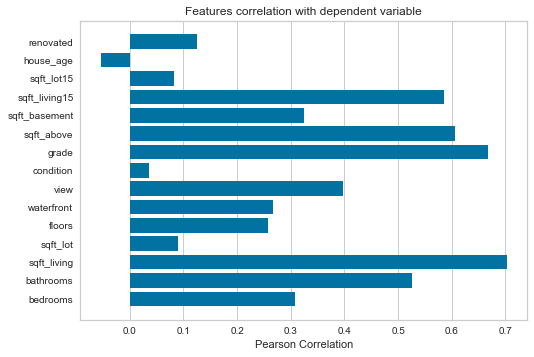

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [13]:
visualizer = FeatureCorrelation(labels=feature_names)
visualizer.fit(features, target)
visualizer.poof()

- This shows how each individual features of a house are correlated with the price of a house. 
- We can see that all the features are positively correlated except 'house_age' of a home. This shows that older house tend to have lower prices.
- Negative correlation indicates variables movie in opposite directions
- One way to choose variables for our regression analysis is to choose only those varibles that are highly correlated either positively or negatively 
- Instead manually choosing the variable, we will use SelectKBest object from the SciKit learn library

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression


f_regression and mutual_info_regression is used to statistically choose variables with high correlation with the price

In [16]:
select_univariate = SelectKBest(f_regression, k=5).fit(features, target)


- f_regression calculates the regression between every x-variable and the corresponding y-value and select the best 5 relevant features. 
- Using .get() method to get the selected features

In [17]:
features_mask = select_univariate.get_support()
features_mask

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [19]:
selected_columns = features.columns[features_mask]
selected_columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [20]:
selected_features = features[selected_columns]
selected_features.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [21]:
selected_features.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,290.000000,1.000000,290.000000,399.000000
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000


Standardizing our data to make it fit for machine learning model

In [23]:
from sklearn.preprocessing import scale 
X = pd.DataFrame(data=scale(selected_features), columns=selected_features.columns)
y = target

In [26]:
X.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.051951e-15,3.174253e-16,-2.328998e-15,3.892022e-16,-1.506632e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.745920e+00,-1.948891e+00,-5.663344e+00,-1.809494e+00,-2.316325e+00
25%,-4.736214e-01,-7.108948e-01,-5.588357e-01,-7.226314e-01,-7.244971e-01
50%,1.756067e-01,-1.849914e-01,-5.588357e-01,-2.758102e-01,-2.138280e-01
75%,5.002207e-01,5.118578e-01,2.919156e-01,5.091458e-01,5.448802e-01
max,7.641730e+00,1.247807e+01,4.545672e+00,9.204044e+00,6.162239e+00


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [28]:
X_train.shape, X_test.shape

((17290, 5), (4323, 5))

In [29]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = linear_regression.predict(X_test)
y_pred

array([307801.38229486, 393924.37989376, 635621.93256447, ...,
       550549.90602712, 239691.43270017, 281154.3535643 ])

In [33]:
df = pd.DataFrame({'Test':y_test, 'Predicted':y_pred})
df.head()

,Test,Predicted
851,287653.0,307801.382295
20149,385000.0,393924.379894
6477,1339000.0,635621.932564
11468,268000.0,621258.019663
6985,217000.0,422200.349767


In [34]:
from sklearn.metrics import r2_score
score = linear_regression.score(X_train, y_train)
r2score = r2_score(y_test, y_pred)

In [35]:
print('Score: {}'.format(score))
print('r2_score: {}'.format(r2score))

Score: 0.5483290904736207
r2_score: 0.5284273199287777


In [36]:
linear_regression.coef_

array([-30078.40075829, 227518.45882085, 130152.52191187, -69791.27018677,
        17977.10528217])

In [37]:
linear_regression.intercept_

539777.1122182349

Using analytical model to calculate R$^2$

In [38]:
import statsmodels.api as sm

In [39]:
X_train = sm.add_constant(X_train)

In [40]:
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_train)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     4197.
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:04:04   Log-Likelihood:            -2.3910e+05
No. Observations:               17290   AIC:                         4.782e+05
Df Residuals:                   17284   BIC:                         4.783e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.398e+05   1865.098    289.410

This shows that the model is significant.